# BAX 452: Assignment 5 Solutions

<b>The Madelon dataset is a synthetic dataset that was generated for a machine learning competition. It is a high-dimensional dataset, with 500 features and 2,600 data points. It has a highly non-linear structure, and in this homework assignment, you’ll be diving into it further with PCA and k-means clustering. When you are asked to generate a plot, please provide the image in your final writeup along with a brief analysis of its major features.</b>

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import numpy as np

## Part 1

<b>Before performing any dimensionality reduction, write a program to use k-means clustering on the Madelon dataset. Try the following k values: 4, 8, 16, 32, 64. 
    
1. What preprocessing techniques did you apply, if any?</b>

Some of the important preprocessing techniques to apply before performing k-means clustering include:
- including numerical variables only
- removing or reducing the effect of noise / outliers
- making sure variables are symmetrically distributed / not skewed
- making sure variables are on the same scale

All variables V1-V500 in this dataset are already numerical by default. 

We generally choose to drop outliers when the outliers are considered erroneous or irrelevant to the analysis. Robust scaling would be a better approach for this particular dataset because the data normalization and rescaling can be particularly useful for ML models based on distance calculations, like kNN and k-means. Dropping data points might bias the resulting clusters.

We can proceed by transforming each column's data into a normal distribution, to put the features on the same scale, then use robust scaling to mitigate the effect of outliers.

In [44]:
madelon = pd.read_csv('madelon.csv').drop(columns = ['Unnamed: 0']).dropna()
madelon_normalized = madelon.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))
madelon_normalized.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0.52,-0.22,0.71,-0.49,-1.18,-1.21,0.26,-0.41,-0.79,-0.79,...,-0.25,0.54,-0.39,-0.10,0.49,-0.68,0.49,-0.31,-0.90,0.21
1,0.20,-0.84,-1.27,0.41,2.08,-0.63,1.13,1.75,-0.13,-1.34,...,-0.92,-0.20,0.03,-1.25,0.55,-0.66,0.83,0.65,0.04,1.02
2,0.83,1.93,-0.27,-1.72,-1.28,-1.21,-0.95,1.03,-0.46,-0.25,...,0.23,0.54,0.24,1.19,0.35,-0.26,0.32,0.43,-0.25,0.29
3,-0.28,0.25,0.02,0.18,-0.14,-1.07,-1.57,-1.85,0.98,-0.38,...,0.42,0.30,-0.52,0.58,-1.14,-1.11,-0.54,-0.09,-0.39,-1.14
4,0.36,0.61,0.48,0.63,-0.84,0.24,-1.94,1.03,-0.00,-1.48,...,0.28,0.05,-1.45,-0.49,-0.22,-0.07,0.49,1.53,-0.36,0.79


In [45]:
transformer = RobustScaler().fit(madelon_normalized)
madelon_normalized = transformer.transform(madelon_normalized)
madelon_normalized = pd.DataFrame(madelon_normalized, columns = ['V{}'.format(i) for i in range(1, 501)])
madelon_normalized.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0.380952,-0.175573,0.549618,-0.335821,-0.906250,-0.892308,0.186567,-1.0,-0.603053,-0.59854,...,-0.179104,0.398374,-0.290076,-0.113074,0.380597,-0.496241,0.379562,-0.227273,-0.659259,0.140741
1,0.126984,-0.648855,-0.961832,0.335821,1.640625,-0.446154,0.835821,2.0,-0.099237,-1.00000,...,-0.679104,-0.203252,0.030534,-0.925795,0.425373,-0.481203,0.627737,0.500000,0.037037,0.740741
2,0.626984,1.465649,-0.198473,-1.253731,-0.984375,-0.892308,-0.716418,1.0,-0.351145,-0.20438,...,0.179104,0.398374,0.190840,0.798587,0.276119,-0.180451,0.255474,0.333333,-0.177778,0.200000
3,-0.253968,0.183206,0.022901,0.164179,-0.093750,-0.784615,-1.179104,-3.0,0.748092,-0.29927,...,0.320896,0.203252,-0.389313,0.367491,-0.835821,-0.819549,-0.372263,-0.060606,-0.281481,-0.859259
4,0.253968,0.458015,0.374046,0.500000,-0.640625,0.223077,-1.455224,1.0,-0.000000,-1.10219,...,0.216418,0.000000,-1.099237,-0.388693,-0.149254,-0.037594,0.379562,1.166667,-0.259259,0.570370


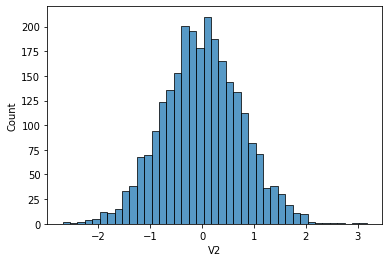

In [46]:
sns.histplot(madelon_normalized['V2'])
plt.show()

<b>2. Describe qualitatively: how does the number of clusters affect the performance of the clustering algorithm on the dataset?</b>

There is a tradeoff in selecting the number of clusters in k-means: if the number of clusters is too low, then the algorithm might group dissimilar data points together, resulting in a loss of information and a decrease in the quality of the clustering results. On the other hand, if the number of clusters is too high, then the algorithm might create too many clusters, which can result in overfitting and an increase in the complexity of the model. This can also lead to a decrease in the quality of the clustering results.

After exploring possible k values from [4, 8, 16, 32, 64], we notice that as k grows larger, the number of points grouped into each category becomes more heterogenous, with spikes in the bar graphs where there are clusters that have many more points. In the 64-cluster instance, many clusters have < 20 points. 

In [47]:
madelon_arr = madelon_clean.to_numpy()
madelon_arr

array([[ 0.38095238, -0.17557252,  0.54961832, ..., -0.22727273,
        -0.65925926,  0.14074074],
       [ 0.12698413, -0.64885496, -0.96183206, ...,  0.5       ,
         0.03703704,  0.74074074],
       [ 0.62698413,  1.46564885, -0.19847328, ...,  0.33333333,
        -0.17777778,  0.2       ],
       ...,
       [ 0.38095238,  0.03053435,  0.41221374, ..., -0.11363636,
        -0.48148148,  0.74074074],
       [-0.62698413, -0.3740458 ,  0.3740458 , ...,  0.38636364,
         2.0962963 ,  0.02222222],
       [ 0.        , -0.77862595,  0.1221374 , ...,  0.61363636,
         0.55555556,  1.        ]])

In [48]:
def k_means_analysis(n_clusters):
    kmeans_model = KMeans(n_clusters = n_clusters, random_state = 0).fit(madelon_arr)
    labels = kmeans_model.labels_
    print(labels[:5])

    num_per_cluster = []
    for i in range(n_clusters):
        curr_num = len(labels[labels == i])
        print('Number of data points in cluster', i, curr_num)
        num_per_cluster.append(curr_num)

    print('SSE for {} clusters'.format(n_clusters), kmeans_model.inertia_)
    return num_per_cluster
    
num_per_cluster_4 = k_means_analysis(4)
print()
num_per_cluster_8 = k_means_analysis(8)
print()
num_per_cluster_16 = k_means_analysis(16)
print()
num_per_cluster_32 = k_means_analysis(32)
print()
num_per_cluster_64 = k_means_analysis(64)

[0 2 0 2 3]
Number of data points in cluster 0 538
Number of data points in cluster 1 555
Number of data points in cluster 2 542
Number of data points in cluster 3 512
SSE for 4 clusters 597393.5050480264

[0 4 7 1 3]
Number of data points in cluster 0 85
Number of data points in cluster 1 304
Number of data points in cluster 2 304
Number of data points in cluster 3 353
Number of data points in cluster 4 339
Number of data points in cluster 5 171
Number of data points in cluster 6 304
Number of data points in cluster 7 287
SSE for 8 clusters 593818.1350365527

[14  6  7 11  9]
Number of data points in cluster 0 105
Number of data points in cluster 1 178
Number of data points in cluster 2 138
Number of data points in cluster 3 87
Number of data points in cluster 4 97
Number of data points in cluster 5 143
Number of data points in cluster 6 112
Number of data points in cluster 7 90
Number of data points in cluster 8 85
Number of data points in cluster 9 171
Number of data points in clust

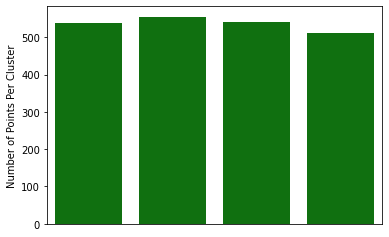

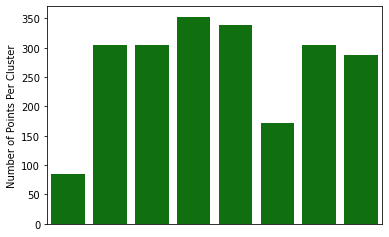

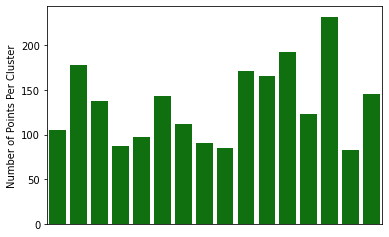

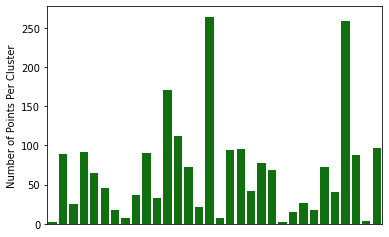

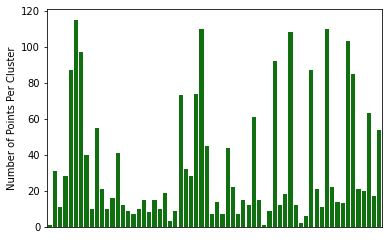

In [49]:
df_4 = pd.DataFrame({'Cluster': range(4), 'Number of Points Per Cluster': num_per_cluster_4})
sns.barplot(data = df_4, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_8 = pd.DataFrame({'Cluster': range(8), 'Number of Points Per Cluster': num_per_cluster_8})
sns.barplot(data = df_8, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_16 = pd.DataFrame({'Cluster': range(16), 'Number of Points Per Cluster': num_per_cluster_16})
sns.barplot(data = df_16, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_32 = pd.DataFrame({'Cluster': range(32), 'Number of Points Per Cluster': num_per_cluster_32})
sns.barplot(data = df_32, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_64 = pd.DataFrame({'Cluster': range(64), 'Number of Points Per Cluster': num_per_cluster_64})
sns.barplot(data = df_64, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

<b>3. Generate a plot of the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis). What appears to be the optimal k from the list of values you used, and why?</b>

According to the elbow plot below, 64 appears to be the optimal k, with the lowest SSE between data points and centroids. To get more information about a global optimal k, it might have been more effective to pick larger k values to fully visualize the elbow e.g. 128, 256, etc. The decrease in SSE also appears to become progressively steeper, indicating this trend might continue with increasing k.

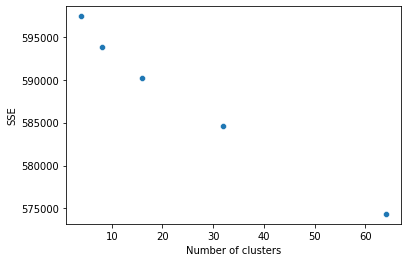

In [53]:
def get_sse(n_clusters):
    kmeans_model = KMeans(n_clusters = n_clusters, random_state = 0).fit(madelon_arr)
    return kmeans_model.inertia_

n_clusters_arr = [4, 8, 16, 32, 64]
sns.scatterplot(x = n_clusters_arr, y = [get_sse(i) for i in n_clusters_arr])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

<b>4. For k = 8, how did you initialize the set of cluster centroids before running k-means? Rerun k-means again, this time ensuring that the centroids are all different. Does this – and if so, to what extent – affect the final clusters created?</b>

By default, the init parameter to the KMeans algorithm in scikit-learn is kmeans++. According to the documentation, this value uses an algorithm to speed up convergence by using a heuristic to optimize the selection of the initial centroids. On the other hand, setting init to random chooses n_clusters observations randomly, and thus can lead to slower or suboptimal convergence.

We notice in this case, however, that the minimum value achieved by the SSE in the kmeans++ case is 574363.64, while for random it is slightly lower at 574354.02. A similar trend is followed in the distribution of points between clusters, with the number of points per cluster becoming more heterogenous as k increases.

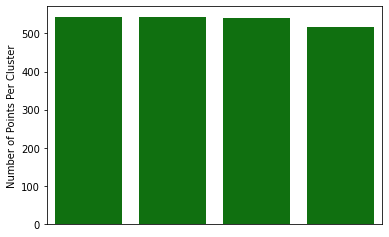

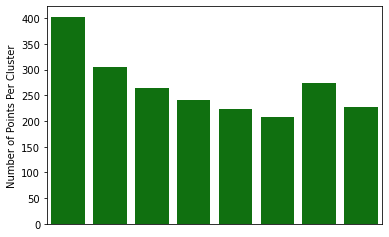

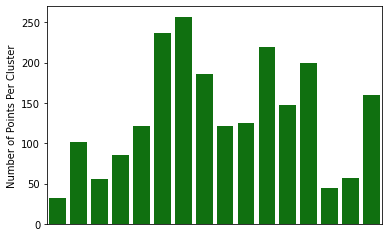

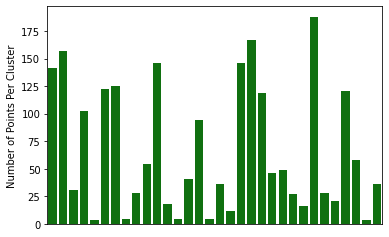

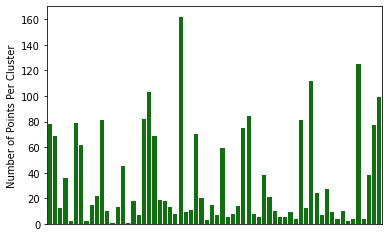

In [55]:
def k_means_analysis(n_clusters):
    kmeans_model = KMeans(n_clusters = n_clusters, init = 'random', random_state = 0).fit(madelon_arr)
    labels = kmeans_model.labels_

    num_per_cluster = []
    for i in range(n_clusters):
        curr_num = len(labels[labels == i])
        num_per_cluster.append(curr_num)
    return num_per_cluster
    
num_per_cluster_4 = k_means_analysis(4)
num_per_cluster_8 = k_means_analysis(8)
num_per_cluster_16 = k_means_analysis(16)
num_per_cluster_32 = k_means_analysis(32)
num_per_cluster_64 = k_means_analysis(64)

df_4 = pd.DataFrame({'Cluster': range(4), 'Number of Points Per Cluster': num_per_cluster_4})
sns.barplot(data = df_4, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_8 = pd.DataFrame({'Cluster': range(8), 'Number of Points Per Cluster': num_per_cluster_8})
sns.barplot(data = df_8, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_16 = pd.DataFrame({'Cluster': range(16), 'Number of Points Per Cluster': num_per_cluster_16})
sns.barplot(data = df_16, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_32 = pd.DataFrame({'Cluster': range(32), 'Number of Points Per Cluster': num_per_cluster_32})
sns.barplot(data = df_32, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

df_64 = pd.DataFrame({'Cluster': range(64), 'Number of Points Per Cluster': num_per_cluster_64})
sns.barplot(data = df_64, x = 'Cluster', y = 'Number of Points Per Cluster', color = 'green')
plt.xlabel('')
plt.xticks([], [])
plt.show()

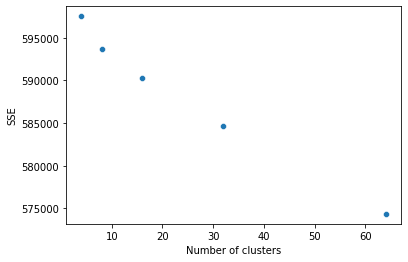

In [57]:
def get_sse(n_clusters):
    kmeans_model = KMeans(n_clusters = n_clusters, init = 'random', random_state = 0).fit(madelon_arr)
    return kmeans_model.inertia_

n_clusters_arr = [4, 8, 16, 32, 64]
sns.scatterplot(x = n_clusters_arr, y = [get_sse(i) for i in n_clusters_arr])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

<b>5. More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?</b>

A few evaluation metrics include:
- Sum of Squared Error (SSE): SSE is a measure of how far the data points are from their assigned cluster centers. It is calculated by summing the squared Euclidean distances between each data point and its assigned cluster center, across all clusters.
- Silhouette coefficient: The silhouette score measures how well each data point fits into its assigned cluster and how far it is from the neighboring clusters. Higher silhouette score values indicate better cluster quality.
- Visual inspection / visualizations

An interesting note about SSE is that even though lower SSE indicates that the data points are closer to their respective cluster centers and thus, the clustering algorithm has performed better, it may not always be a reliable indicator of cluster quality. It tends to independently decrease as the number of clusters increases.

## Part 2

<b>The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. 

1. Fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?</b>

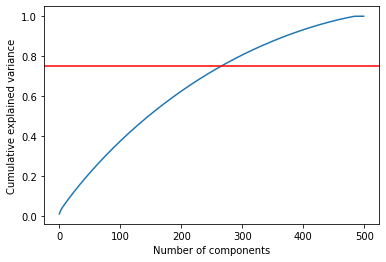

In [58]:
pca = PCA().fit(madelon_arr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y = 0.75, color = 'red')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [59]:
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
np.argmax(cum_exp_var > 0.75)

266

From the cumulative variance plot above, we see that it makes sense to retain 266 components to preserve at least 75% of the variance.

<b>2. Perform PCA with your selected principal components.

Plot the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.</b>

While the values of PC 1 range from -6 to 6 and the values of PC 2 range from -4 to 4, there is no clear trend to be observed in this graph.

In [60]:
pca = PCA(266)  # project from 500to 192 dimensions
madelon_projected = pca.fit_transform(madelon_arr)
print(madelon_arr.shape)
print(madelon_projected.shape)

(2147, 500)
(2147, 266)


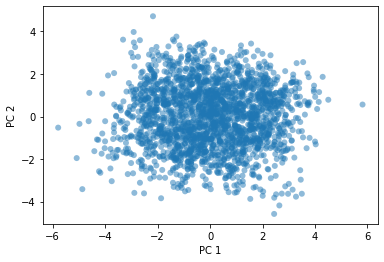

In [61]:
plt.scatter(madelon_projected[:, 0], madelon_projected[:, 1],
            edgecolor = 'none', alpha = 0.5,
            cmap = plt.cm.get_cmap('Blues', 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

<b>2. Perform PCA with your selected principal components.

Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.</b>

In [64]:
loadings = pd.DataFrame(pca.components_.T, columns = ['PC{}'.format(i) for i in range(1, 267)], index = madelon.columns)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266
V1,0.004830,0.014081,-0.031501,0.033844,0.031663,-0.007826,0.036067,-0.000269,-0.012500,-0.012988,...,0.038991,0.019581,-0.043318,-0.022196,-0.068721,-0.014257,-0.059664,0.066308,0.026204,-0.036023
V2,-0.020177,0.014672,-0.004237,0.001495,-0.004879,0.035046,0.058864,0.018628,0.013146,-0.004990,...,0.041966,0.030313,0.038132,0.025783,-0.015356,0.020116,0.021535,-0.003859,0.041683,0.031276
V3,-0.002244,0.005769,-0.020043,-0.001372,-0.025652,0.041502,0.010908,0.053506,0.014937,0.006411,...,-0.026355,-0.015858,0.037293,-0.036292,0.003217,0.056823,0.002271,0.026916,0.049391,0.004452
V4,0.003476,0.008076,0.001646,0.012695,0.000078,0.006395,-0.035223,0.078180,-0.007266,0.030837,...,0.060622,0.058940,-0.039146,0.015717,-0.045584,-0.010657,-0.025237,-0.028450,0.024994,-0.054570
V5,0.001884,-0.003288,-0.012747,0.026810,-0.001129,-0.001460,0.013135,-0.011560,0.037437,-0.079843,...,0.098349,0.025963,0.097543,0.023656,0.023755,0.039561,-0.000429,0.016619,0.038569,0.022216


In [65]:
loadings['abs_pc1_pc2_sum'] = loadings['PC1'].abs() + loadings['PC2'].abs()
loadings_minified = loadings[['PC1', 'PC2', 'abs_pc1_pc2_sum']]
loadings_minified.head()

,PC1,PC2,abs_pc1_pc2_sum
V1,0.004830,0.014081,0.018912
V2,-0.020177,0.014672,0.034849
V3,-0.002244,0.005769,0.008013
V4,0.003476,0.008076,0.011553
V5,0.001884,-0.003288,0.005173


In [66]:
loadings_minified.sort_values('abs_pc1_pc2_sum', ascending = False).head()

,PC1,PC2,abs_pc1_pc2_sum
V129,0.319353,0.224833,0.544187
V106,0.309444,0.219827,0.529272
V473,-0.311054,0.199524,0.510578
V443,-0.309450,0.197591,0.507041
V339,-0.358418,-0.134669,0.493087


The variables with the highest absolute loading are V129, V106. They will be the axes of our "original data" plot.

Your graph here might look different based on what preprocessing steps you took e.g. dropping outliers vs. robust scaling -- it might affect the principal components selected and the subsequent rankings above. As long as your code for finding the variables with highest loading is correct, you will get full points on this part.

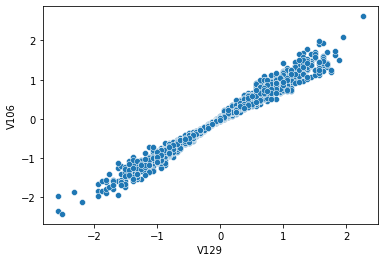

In [68]:
sns.scatterplot(x = madelon_clean['V129'], y = madelon_clean['V106'])
plt.show()

<b>3. Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?</b>

There are no obvious clusters in the graph from (2) of PC 1 vs. PC 2, but that's because we're trying to reduce 500 dimensions to just 2 for plotting purposes. The clusters may not be as visible in the reduced space even though they exist in a higher dimension.

## Part 3

<b>1. Now, we will run k-means clustering on the transformed data from the previous problem.

Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.</b>

Running PCA prior to k-means clustering:
- helps eliminate noise
- increases computational efficiency by dropping features / performing calculations on a lower number of dimensions
- avoids the issue of -- as the number of dimensions increases -- the distance computation essential to k-means yielding similar results for the data points, making them harder to separate.

<b>2. Use the same k values again (4, 8, 16, 32, 64) to again generate an elbow plot. 

What is the optimal k? Is it different from the one you found in (1)?</b>

The optimal k still appears to be 64 -- perhaps picking a few k values beyond this maximum would have given us a better idea of the trend.

<b>Compare the SSE values plotted in this exercise to the previous plot you generated in (1c) before performing PCA.</b>

The SSE values are noticeably lesser, dipping to around 420000, indicating the effect of performing PCA before k-means.

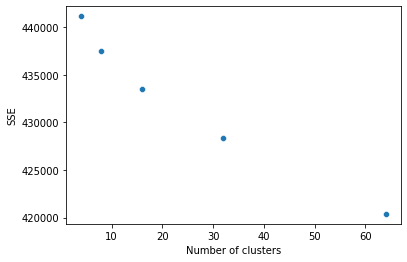

In [69]:
def get_sse(n_clusters):
    kmeans_model = KMeans(n_clusters = n_clusters, random_state = 0).fit(madelon_projected)
    return kmeans_model.inertia_

n_clusters_arr = [4, 8, 16, 32, 64]
sns.scatterplot(x = n_clusters_arr, y = [get_sse(i) for i in n_clusters_arr])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

<b>3. Again, create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points. Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?</b>

The cluster centers are labeled as black and because there are 32 colors, we haven't included a legend. Cluster delineations are not clear in any of the 5 iterations, but this may be due to (1) high-dimensional dataset -- clusters were difficult to see even after convergence in the previous parts or (2) too few iterations to see noticeable changes. We can, however, observe the cluster centers distributing themselves more widely across the dataset between iteration 1 and 5.

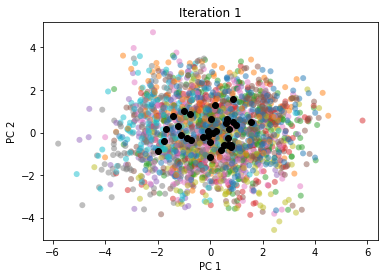

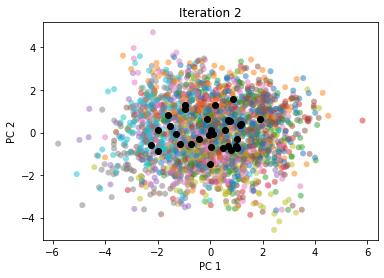

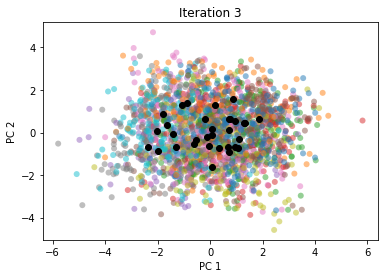

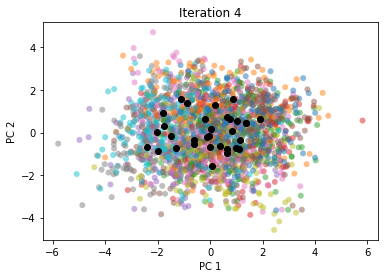

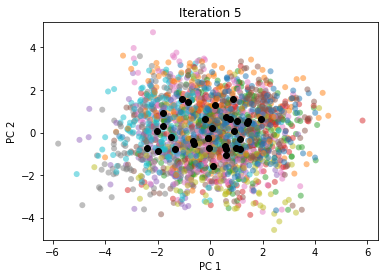

In [73]:
n_clusters = 32
iterations = 5
centroids = None

cm = plt.get_cmap('gist_rainbow')

for i in range(1, iterations + 1):
    kmeans_model = KMeans(n_clusters = n_clusters, random_state = 0, max_iter = i).fit(madelon_projected)
    labels = kmeans_model.labels_
    centers = kmeans_model.cluster_centers_
    
    for j in range(n_clusters):
        cluster_points = madelon_projected[labels == j]
        curr_color = cm(j//3*3.0/n_clusters)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                edgecolor = 'none', alpha = 0.5,
                cmap = curr_color)
    
    plt.scatter(centers[:, 0], centers[:, 1], color = 'black')

    plt.title('Iteration {}'.format(i))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()